## Import libraries

In [168]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [169]:
df = pd.read_csv('spotify_data.csv')

In [170]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## The column 'Unnamed: 0' doesn't contain important values, so we delete it

In [171]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## On the heatmap we can see that popularity of the song depends on the values year, instrumentalness, duration_ms, loudness, danceability

/var/folders/fg/cqky7zt5763738spc5v523xw0000gn/T/ipykernel_90057/3072380942.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

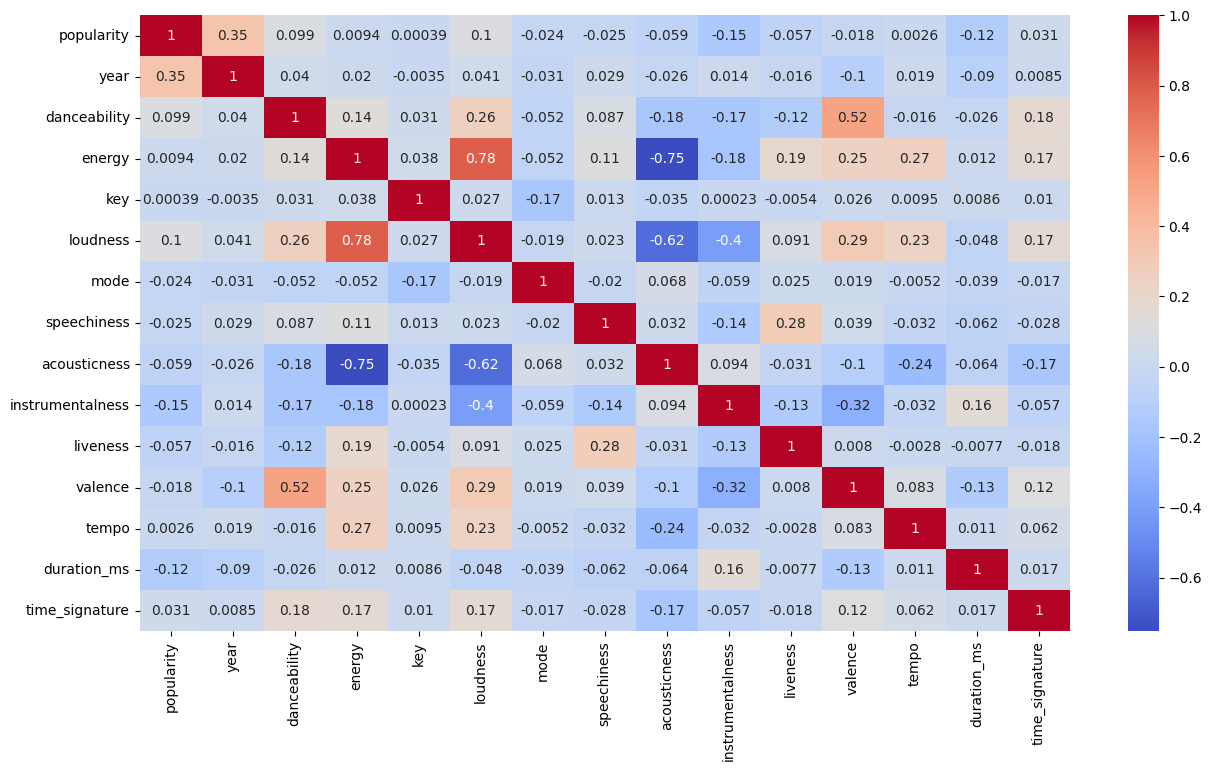

In [172]:
plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### The most popular song is 'Flowers' by Miley Cyrus

In [173]:
df[df['popularity'] == df['popularity'].max()]

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
612503,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,2023,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,4


### The popularity of songs increases until 2022, but significantly decreases in 2023. This is likely due to the fact that the new songs haven't had enough time to gain popularity yet.

In [174]:
df_mean = df.groupby('year').agg({'popularity':'mean'}).reset_index()

Text(0, 0.5, 'Mean popularity')

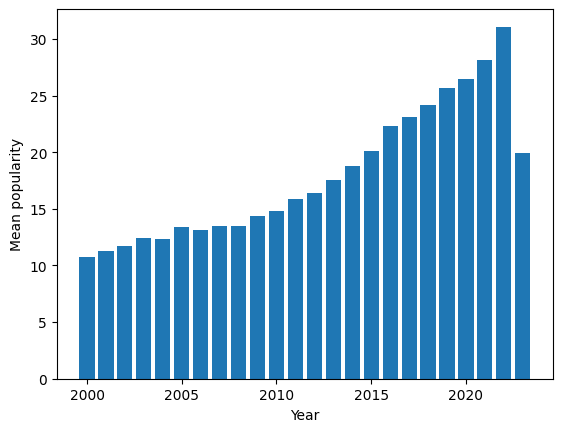

In [175]:
plt.bar(df_mean['year'], df_mean['popularity'])
plt.xlabel('Year')
plt.ylabel('Mean popularity')

### List of the most popular artists

In [176]:
df.groupby('artist_name').agg({'popularity': 'mean'}).sort_values('popularity', ascending=False).head(10).reset_index()

,artist_name,popularity
0,NewJeans,85.333333
1,Elley Duhé,85.000000
2,Rema,80.666667
3,Chani Nattan,80.000000
4,SunKissed Lola,80.000000
5,Jogja Hip Hop Foundation,80.000000
6,Fujii Kaze,80.000000
7,Cian Ducrot,79.000000
8,Oxlade,79.000000
9,Jung Kook,78.000000


### Top-10 popular genre

In [177]:
df_genre = df.groupby('genre').agg({'popularity': 'mean'}).sort_values('popularity', ascending=False).reset_index().head(10)

<BarContainer object of 10 artists>

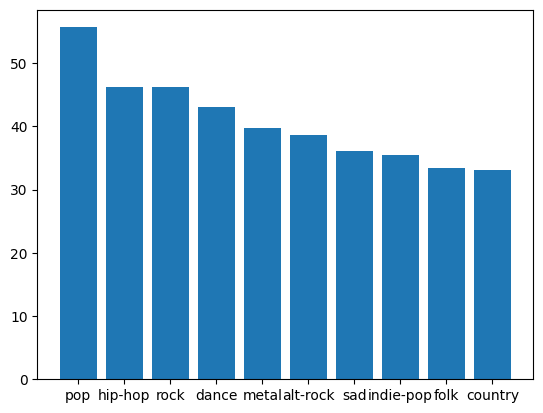

In [178]:
plt.bar(df_genre['genre'], df_genre['popularity'])

### List of the most popular song in every years

In [179]:
df_name = df.groupby('year').agg({'popularity': 'max'}).reset_index()

In [180]:
df_name = pd.merge(df_name, df, on=['year', 'popularity'], how='left')

In [181]:
df_name = df_name[['year', 'track_name', 'artist_name']]

In [182]:
df_name.drop_duplicates()

,year,track_name,artist_name
0,2000,The Real Slim Shady,Eminem
1,2001,Chop Suey!,System Of A Down
2,2002,Without Me,Eminem
3,2003,Numb,Linkin Park
4,2004,Mockingbird,Eminem
5,2005,Hips Don't Lie (feat. Wyclef Jean),Shakira
6,2006,Promiscuous,Nelly Furtado
7,2007,505,Arctic Monkeys
8,2007,What I've Done,Linkin Park
9,2008,Sex on Fire,Kings of Leon


### Mean duration of song in different years

In [183]:
df_mean_duration = df.groupby('year').agg({'duration_ms': 'mean'}).reset_index()
df_mean_duration['duration_ms'] = df_mean_duration['duration_ms']/60000
df_mean_duration.rename(columns={'duration_ms': 'duration_min'})

,year,duration_min
0,2000,4.331459
1,2001,4.365222
2,2002,4.388925
3,2003,4.316647
4,2004,4.306355
5,2005,4.361092
6,2006,4.386501
7,2007,4.415313
8,2008,4.398722
9,2009,4.427241


### The longest track name

In [184]:
treck_len = treck_len.assign(character_count=df['track_name'].str.len())

In [185]:
df[df['track_name'].str.len() == treck_len['character_count'].max()]

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
362179,Sidonie,"Fascinados (feat. Joan Manuel Serrat, Leiva, V...",2NWWhvKfxY7jVG2PH5F5CY,52,2018,spanish,0.639,0.883,7,-6.448,0,0.0688,0.0843,0.000071,0.225,0.431,140.008,274147,4


## The shortest track name

In [186]:
df[df['track_name'].str.len() == treck_len['character_count'].min()].head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
4223,Samael,I,7nE4ShgJLq4HfmckYDyzUP,11,2012,black-metal,0.410,0.958,6,-6.079,1,0.0876,0.000329,0.302000,0.0883,0.1260,142.031,240947,4
4326,Mizmor,I,0qEynqePkVQHAipm84G1k5,5,2012,black-metal,0.161,0.465,0,-9.461,1,0.0853,0.000076,0.911000,0.2410,0.1270,130.546,694667,4
5984,Myagi,Q,0BRvFv3otAwO3yiZEyDPL3,0,2012,breakbeat,0.591,0.948,0,-4.764,1,0.0596,0.002000,0.423000,0.3080,0.2710,127.983,448801,4
6586,Pakho Chau,金,25vUKxXV5TqPzdtRU0xgYw,16,2012,cantopop,0.521,0.868,5,-6.014,1,0.0383,0.000966,0.000031,0.1060,0.0398,139.990,233000,4
6592,Cass Phang,追,32sfsuGMhbcMRqEjMXXSlW,16,2012,cantopop,0.487,0.264,5,-9.933,1,0.0307,0.721000,0.000000,0.3430,0.1640,90.737,247147,4


## Songs without popularity

In [187]:
df[df['popularity'] == 0].head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1344,Joni Haastrup,Greetings,2yMbFeC6DW9gP5cDp53IT5,0,2012,afrobeat,0.696,0.862,9,-5.373,1,0.1630,0.072,0.21500,0.6510,0.845,116.633,372933,4
1348,Sir Victor Uwaifo,Do amen do,3FLkLCczhcOkjJDF9CUlH6,0,2012,afrobeat,0.706,0.547,1,-10.564,1,0.1880,0.188,0.12400,0.3490,0.773,133.461,174840,4
1349,Kaleta & Zozo Afrobeat,Shit Music,1604BIyIhqU7Zxt8HeNRS2,0,2012,afrobeat,0.776,0.854,6,-6.017,1,0.0430,0.265,0.00877,0.1170,0.965,135.024,462807,4
1350,Kaleta & Zozo Afrobeat,Mugabe,44Z3uYKnvVbVvezyhdYFZW,0,2012,afrobeat,0.797,0.936,1,-4.947,1,0.0399,0.308,0.03620,0.0738,0.889,104.992,521512,4
1353,Fanga,Kononi,443yKfbiVPjJB62hCgcgTZ,0,2012,afrobeat,0.687,0.722,7,-10.562,1,0.0585,0.540,0.01040,0.0530,0.961,90.458,568554,4


## Year with the largest number of songs

In [188]:
df_count = df.groupby('year').agg({'track_id':'count'}).reset_index()

In [189]:
df_count = df_count[df_count['track_id'] == df_count['track_id'].max()]

In [190]:
df_count[['year']]

,year
18,2018
